### Final annotation of Endothelial cells


Preprocessing:
- Endothelial cells from main object subsetted
- performed scvi batch correction to prepare objects with cell cycle gene regression
- rl20 reannotated

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [3]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/post_scvi20221124/Endo.hvg5000_noCC.scvi_output.with_annotv2.22021124.h5ad')

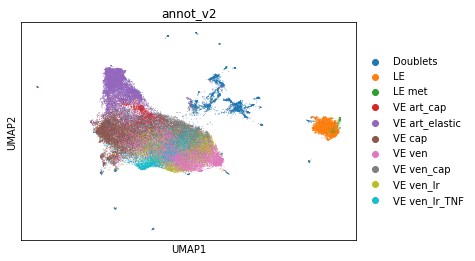

In [4]:
sc.pl.umap(adata,color='annot_v2')

In [5]:
annot = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Endothelial_annot_v3_20221202.csv',index_col=0)

In [6]:
annot

annot_v3
index                                    
AAACGAATCTCTTGCG-GSM4600896     venous_ec
AAAGAACAGCGACCCT-GSM4600896  capillary_ec
AACCATGGTGTCCAAT-GSM4600896     venous_ec
AACTTCTGTATGAAGT-GSM4600896     venous_ec
AGGGAGTAGTTCCATG-GSM4600896  capillary_ec
...                                   ...
GTCTTCGTCGGCCGAT-GSM5525958     venous_ec
TAAGCGTTCTGCTGCT-GSM5525958     venous_ec
TACGGATCAGCTATTG-GSM5525958    cycling_ec
TACTCGCGTAGGGTAC-GSM5525958     venous_ec
TCTCTAAGTGATGATA-GSM5525958  capillary_ec

[58948 rows x 1 columns]

In [7]:
adata.obs['annot_v3'] = annot

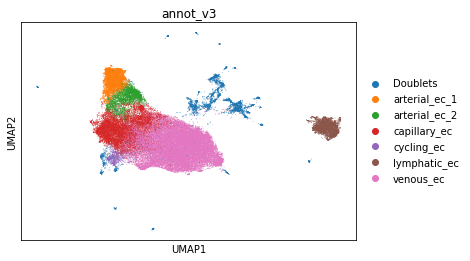

In [8]:
sc.pl.umap(adata,color='annot_v3')

In [9]:
list(adata.obs.annot_v3.unique())

['venous_ec',
 'capillary_ec',
 'lymphatic_ec',
 'Doublets',
 'arterial_ec_2',
 'arterial_ec_1',
 'cycling_ec']

In [10]:
adata.obs['annot_v3'] = (
    adata.obs["annot_v3"]
    .map(lambda x: {'venous_ec':'EC_venous',
 'capillary_ec':'EC_capillary',
 'lymphatic_ec':'EC_lymphatic',
 'arterial_ec_2':'EC_arterial_2',
 'arterial_ec_1':'EC_arterial_1',
 'cycling_ec':'EC_cycling'
    }.get(x, x))
    .astype("category")
)

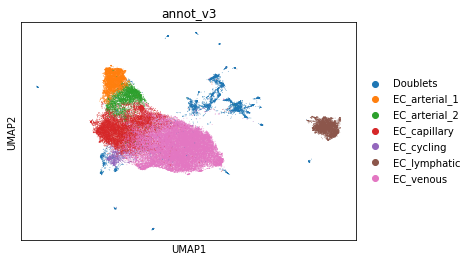

In [11]:
sc.pl.umap(adata,color='annot_v3')

In [18]:
#save raw counts in layers
adata.layers['counts'] = adata.X
#normalise and transform
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [19]:
adata.X.max()

9.128792

In [20]:
adata.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/Endo.hvg5000_noCC.scvi_output.annotv3.22021206.h5ad')

In [13]:
annot = adata.obs.loc[:,['annot_v2','annot_v3']]

In [14]:
annot.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Endo_annot_v3.csv')

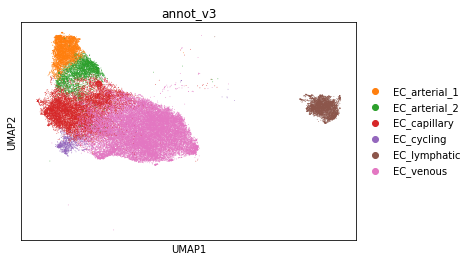

In [15]:
adata_nodoublets = adata[~adata.obs.annot_v3.isin(['Doublets'])].copy()
sc.pl.umap(adata_nodoublets,color='annot_v3')

In [16]:
adata_nodoublets.X.max()

4669.0

In [21]:
adata_nodoublets.write_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Endo.raw.annotv3.nodoublets.22021206.h5ad')

In [22]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *

In [27]:
adata_nodoublets.raw = adata_nodoublets.copy()
mkst = calc_marker_stats(adata_nodoublets, groupby="annot_v3")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')

In [28]:
mks

top_frac_group  top_frac  frac_diff  max_frac_diff top_mean_group  \
KCTD12   EC_arterial_1  0.737029   0.220838       0.291643  EC_arterial_1   
PLLP     EC_arterial_1  0.434519   0.230071       0.372353  EC_arterial_1   
PDCD4    EC_arterial_1  0.645188   0.252665       0.269654  EC_arterial_1   
PCSK5    EC_arterial_1  0.415063   0.282471       0.371138  EC_arterial_1   
RNF144B  EC_arterial_1  0.264644   0.198491       0.203822  EC_arterial_1   
...                ...       ...        ...            ...            ...   
NFKBIZ       EC_venous  0.325841   0.050528       0.102477      EC_venous   
CDKN1A       EC_venous  0.410666   0.056900       0.124033      EC_venous   
SOD2         EC_venous  0.355773   0.041755       0.122425      EC_venous   
LHX6         EC_venous  0.213180   0.023460       0.147661      EC_venous   
EGR1         EC_venous  0.466269   0.027357       0.111265      EC_venous   

         top_mean  mean_diff  max_mean_diff  
KCTD12   0.060278   0.038947       0.045406  
PLLP     0.058354   0.038242       0.053286  
PDCD4    0.057002   0.035893       0.036414  
PCSK5    0.042329   0.033359       0.040265  
RNF144B  0.040110   0.032826       0.033784  
...           ...        ...            ...  
NFKBIZ   0.013997   0.001693       0.007007  
CDKN1A   0.014882   0.001268       0.005101  
SOD2     0.006773   0.001193       0.002710  
LHX6     0.006635   0.001027       0.004917  
EGR1     0.012344   0.000751       0.003935  

[4304 rows x 8 columns]

In [30]:
EC_arterial_1 = mks[mks.top_frac_group.isin(['EC_arterial_1'])]

In [31]:
EC_arterial_1

top_frac_group  top_frac  frac_diff  max_frac_diff top_mean_group  \
KCTD12   EC_arterial_1  0.737029   0.220838       0.291643  EC_arterial_1   
PLLP     EC_arterial_1  0.434519   0.230071       0.372353  EC_arterial_1   
PDCD4    EC_arterial_1  0.645188   0.252665       0.269654  EC_arterial_1   
PCSK5    EC_arterial_1  0.415063   0.282471       0.371138  EC_arterial_1   
RNF144B  EC_arterial_1  0.264644   0.198491       0.203822  EC_arterial_1   
...                ...       ...        ...            ...            ...   
FUT8     EC_arterial_1  0.237029   0.011480       0.146375  EC_arterial_1   
GJA4     EC_arterial_1  0.524895   0.039010       0.356341  EC_arterial_1   
STC1     EC_arterial_1  0.346444   0.087631       0.160815  EC_arterial_1   
PLCG2    EC_arterial_1  0.328870   0.097619       0.175631  EC_arterial_1   
RAPGEF5  EC_arterial_1  0.443305   0.000315       0.115621  EC_arterial_1   

         top_mean  mean_diff  max_mean_diff  
KCTD12   0.060278   0.038947       0.045406  
PLLP     0.058354   0.038242       0.053286  
PDCD4    0.057002   0.035893       0.036414  
PCSK5    0.042329   0.033359       0.040265  
RNF144B  0.040110   0.032826       0.033784  
...           ...        ...            ...  
FUT8     0.027599   0.001695       0.019835  
GJA4     0.013324   0.000789       0.009353  
STC1     0.003949   0.000698       0.001140  
PLCG2    0.001182   0.000362       0.000431  
RAPGEF5  0.047269   0.000048       0.012848  

[162 rows x 8 columns]

In [3]:
adata_nodoublets = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124/no_doublets/Endo.raw.annotv3.nodoublets.22021206.h5ad')

In [4]:
sc.tl.rank_genes_groups(adata_nodoublets,groupby='annot_v3',n_genes=100,method='wilcoxon')

In [5]:
result = adata_nodoublets.uns['rank_genes_groups']
groups = result['names'].dtype.names
df = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
for group in groups for key in ['names','logfoldchanges','pvals','pvals_adj']})
df.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/GoAnnotateMe/Top100DEG/Endo_top100DEG.csv')

## Marker gene plots

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/annotated_v3/no_doublets/Endo.hvg5000_noCC.scvi_output.annotv3.nodoublets.22021208.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 52804 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


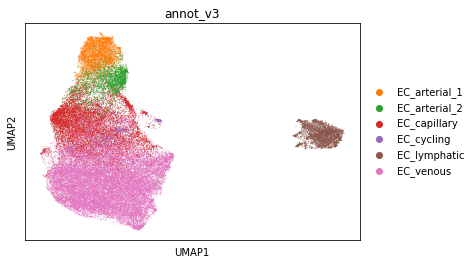

In [4]:
sc.pl.umap(adata,color='annot_v3')

In [5]:
adata.obs.annot_v3.cat.categories

Index(['EC_arterial_1', 'EC_arterial_2', 'EC_capillary', 'EC_cycling',
       'EC_lymphatic', 'EC_venous'],
      dtype='object')

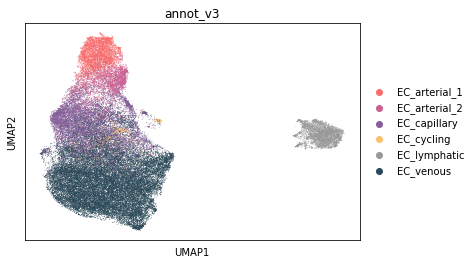

In [6]:
sc.pl.umap(adata,color='annot_v3',palette=['#fa6e6e','#ca6092','#855f9a','#fac06e','#999999','#2a4858'])

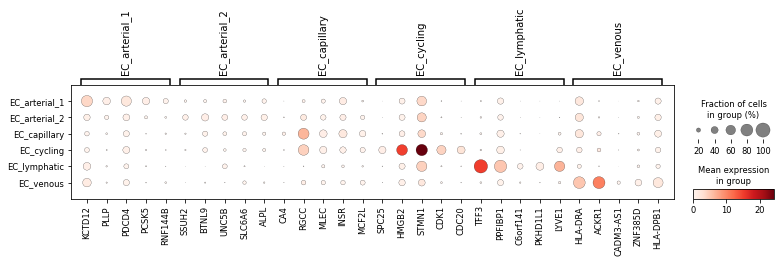

In [7]:
import sys
sys.path.append("/home/jovyan/ao15/Megagut/")
from re5_combine import *
adata.raw = adata.copy()
mkst = calc_marker_stats(adata, groupby="annot_v3")
mks = filter_marker_stats(mkst[2], min_frac_diff=0.1, min_mean_diff=0.1, max_next_frac=0.5, max_next_mean=0.95, strict=False, how='or')
plot_markers(adata, groupby='annot_v3', mks=mks)

In [8]:
marker_genes_dict = {'General EC markers':['PECAM1','CD36'],
                     'General arterial markers':['GJA4','HEY1','CXCL12'],
                     'Arterial 1':['SEMA3G','IGFBP3','FBLN2','FBLN5','ELN'],
                     'Arterial 2':['BTNL9','ALPL'],
                     'Capillary':['RGCC','COL4A1','COL4A2','IL32','MCAM','MYO1B'],
                     'Cycling':['MKI67','TOP2A'],
                     'Lymphatic':['CCL21','TFF3','PROX1','NTS'],
                     'Venous':['ACKR1','CCL14','SELE','TNFRSF6B']
                    
                    
                    }

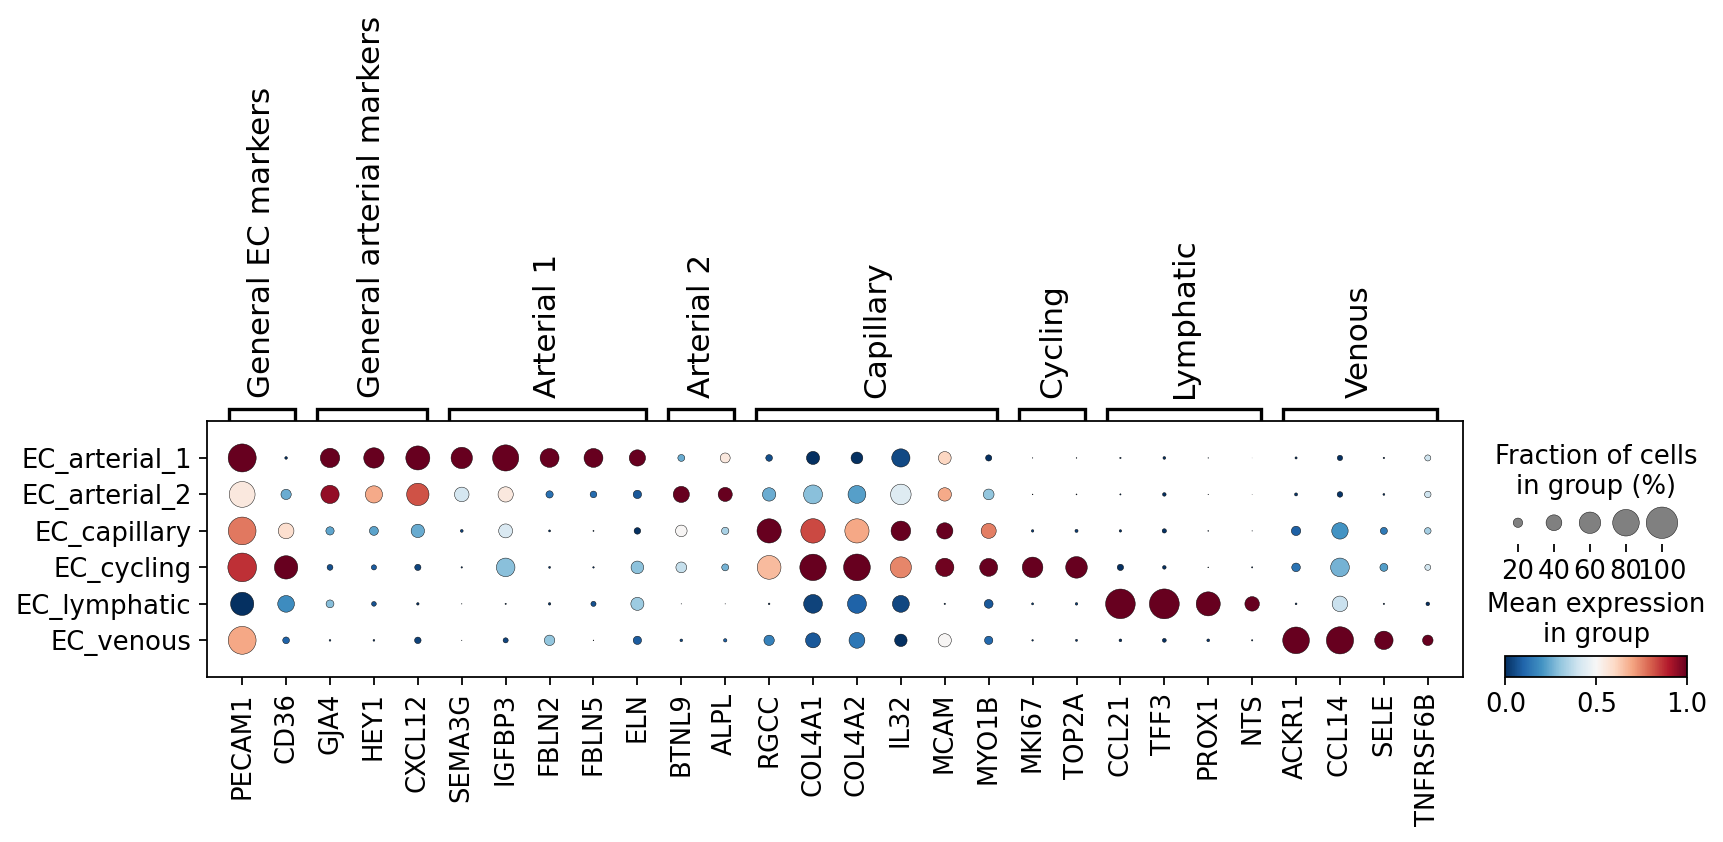

In [9]:
sc.set_figure_params(dpi_save = 300)
sc.pl.dotplot(adata, var_names=marker_genes_dict, groupby='annot_v3', color_map='RdBu_r', standard_scale='var',save='Endo_markers.png')

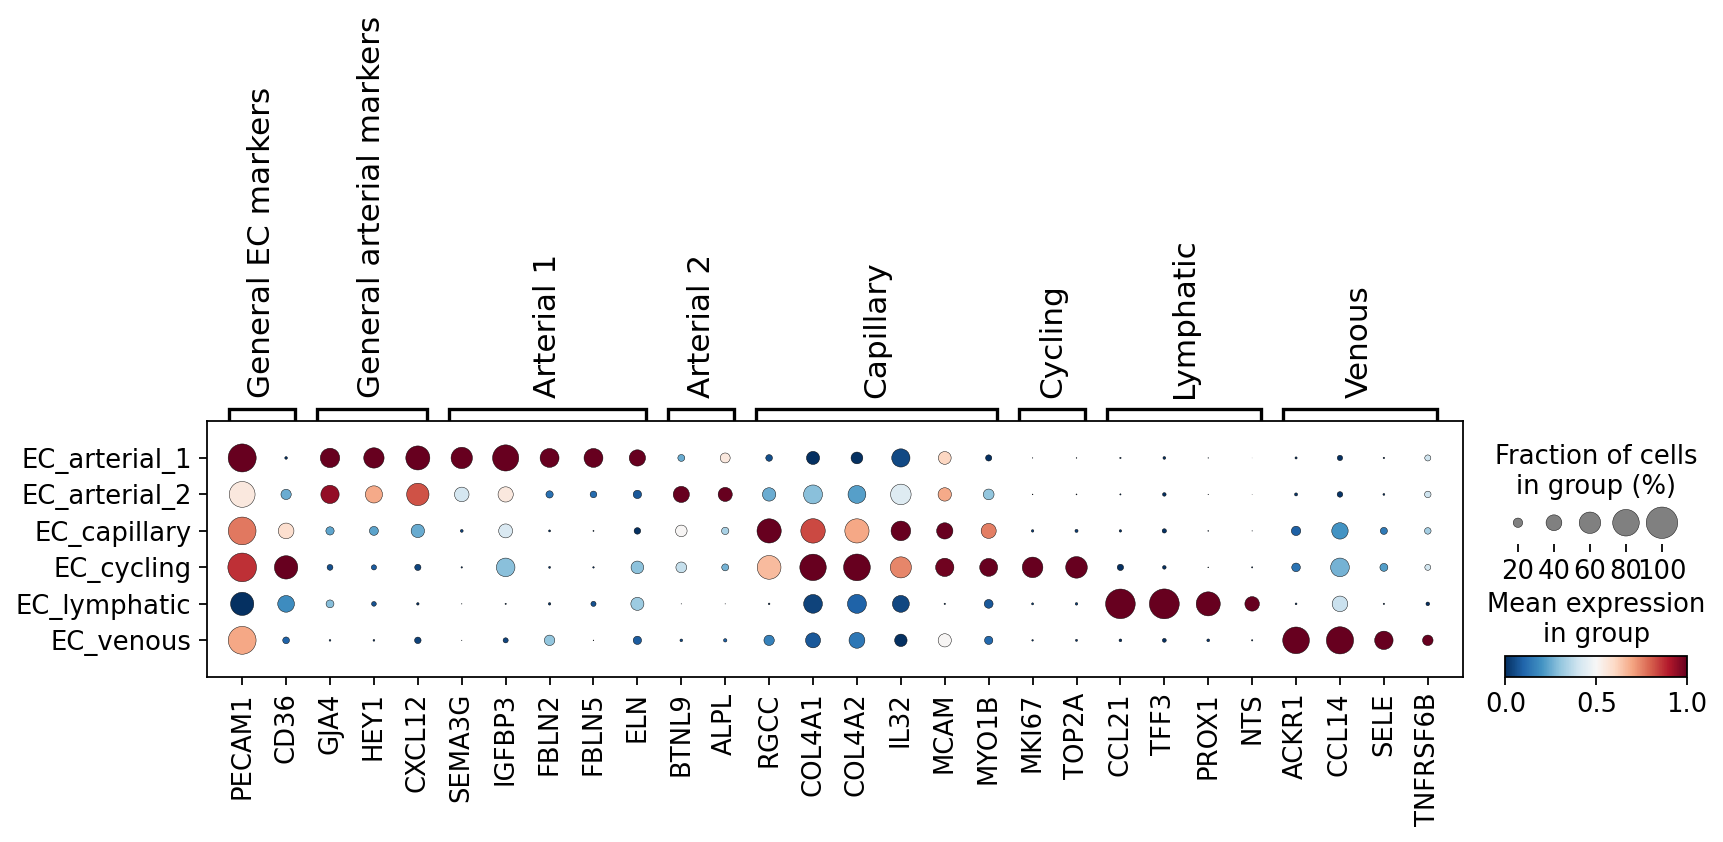

In [10]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sc.pl.dotplot(adata, var_names=marker_genes_dict, groupby='annot_v3', color_map='RdBu_r', standard_scale='var',save='Endo_markers.pdf')

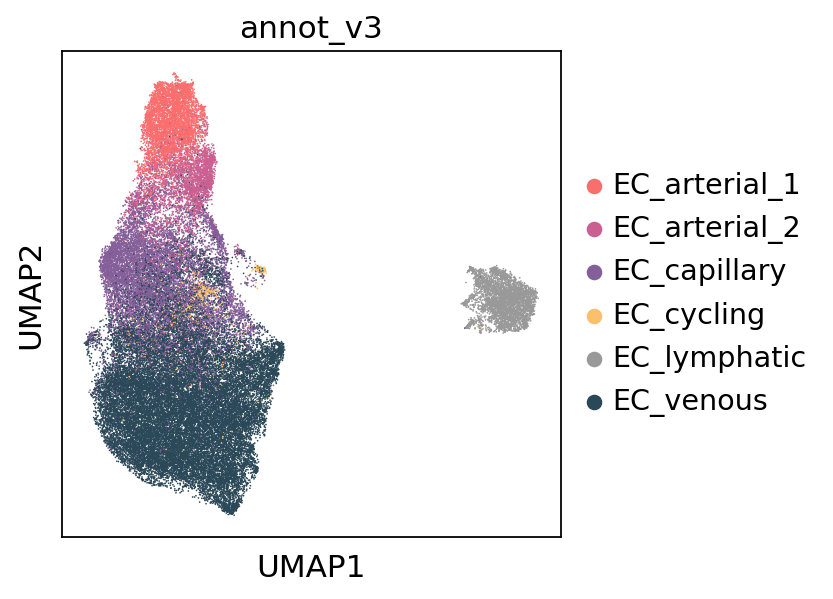

In [11]:
sc.pl.umap(adata,color='annot_v3')

In [12]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['figure.figsize'] = [5,5]
sc.set_figure_params(dpi=300,dpi_save=600)

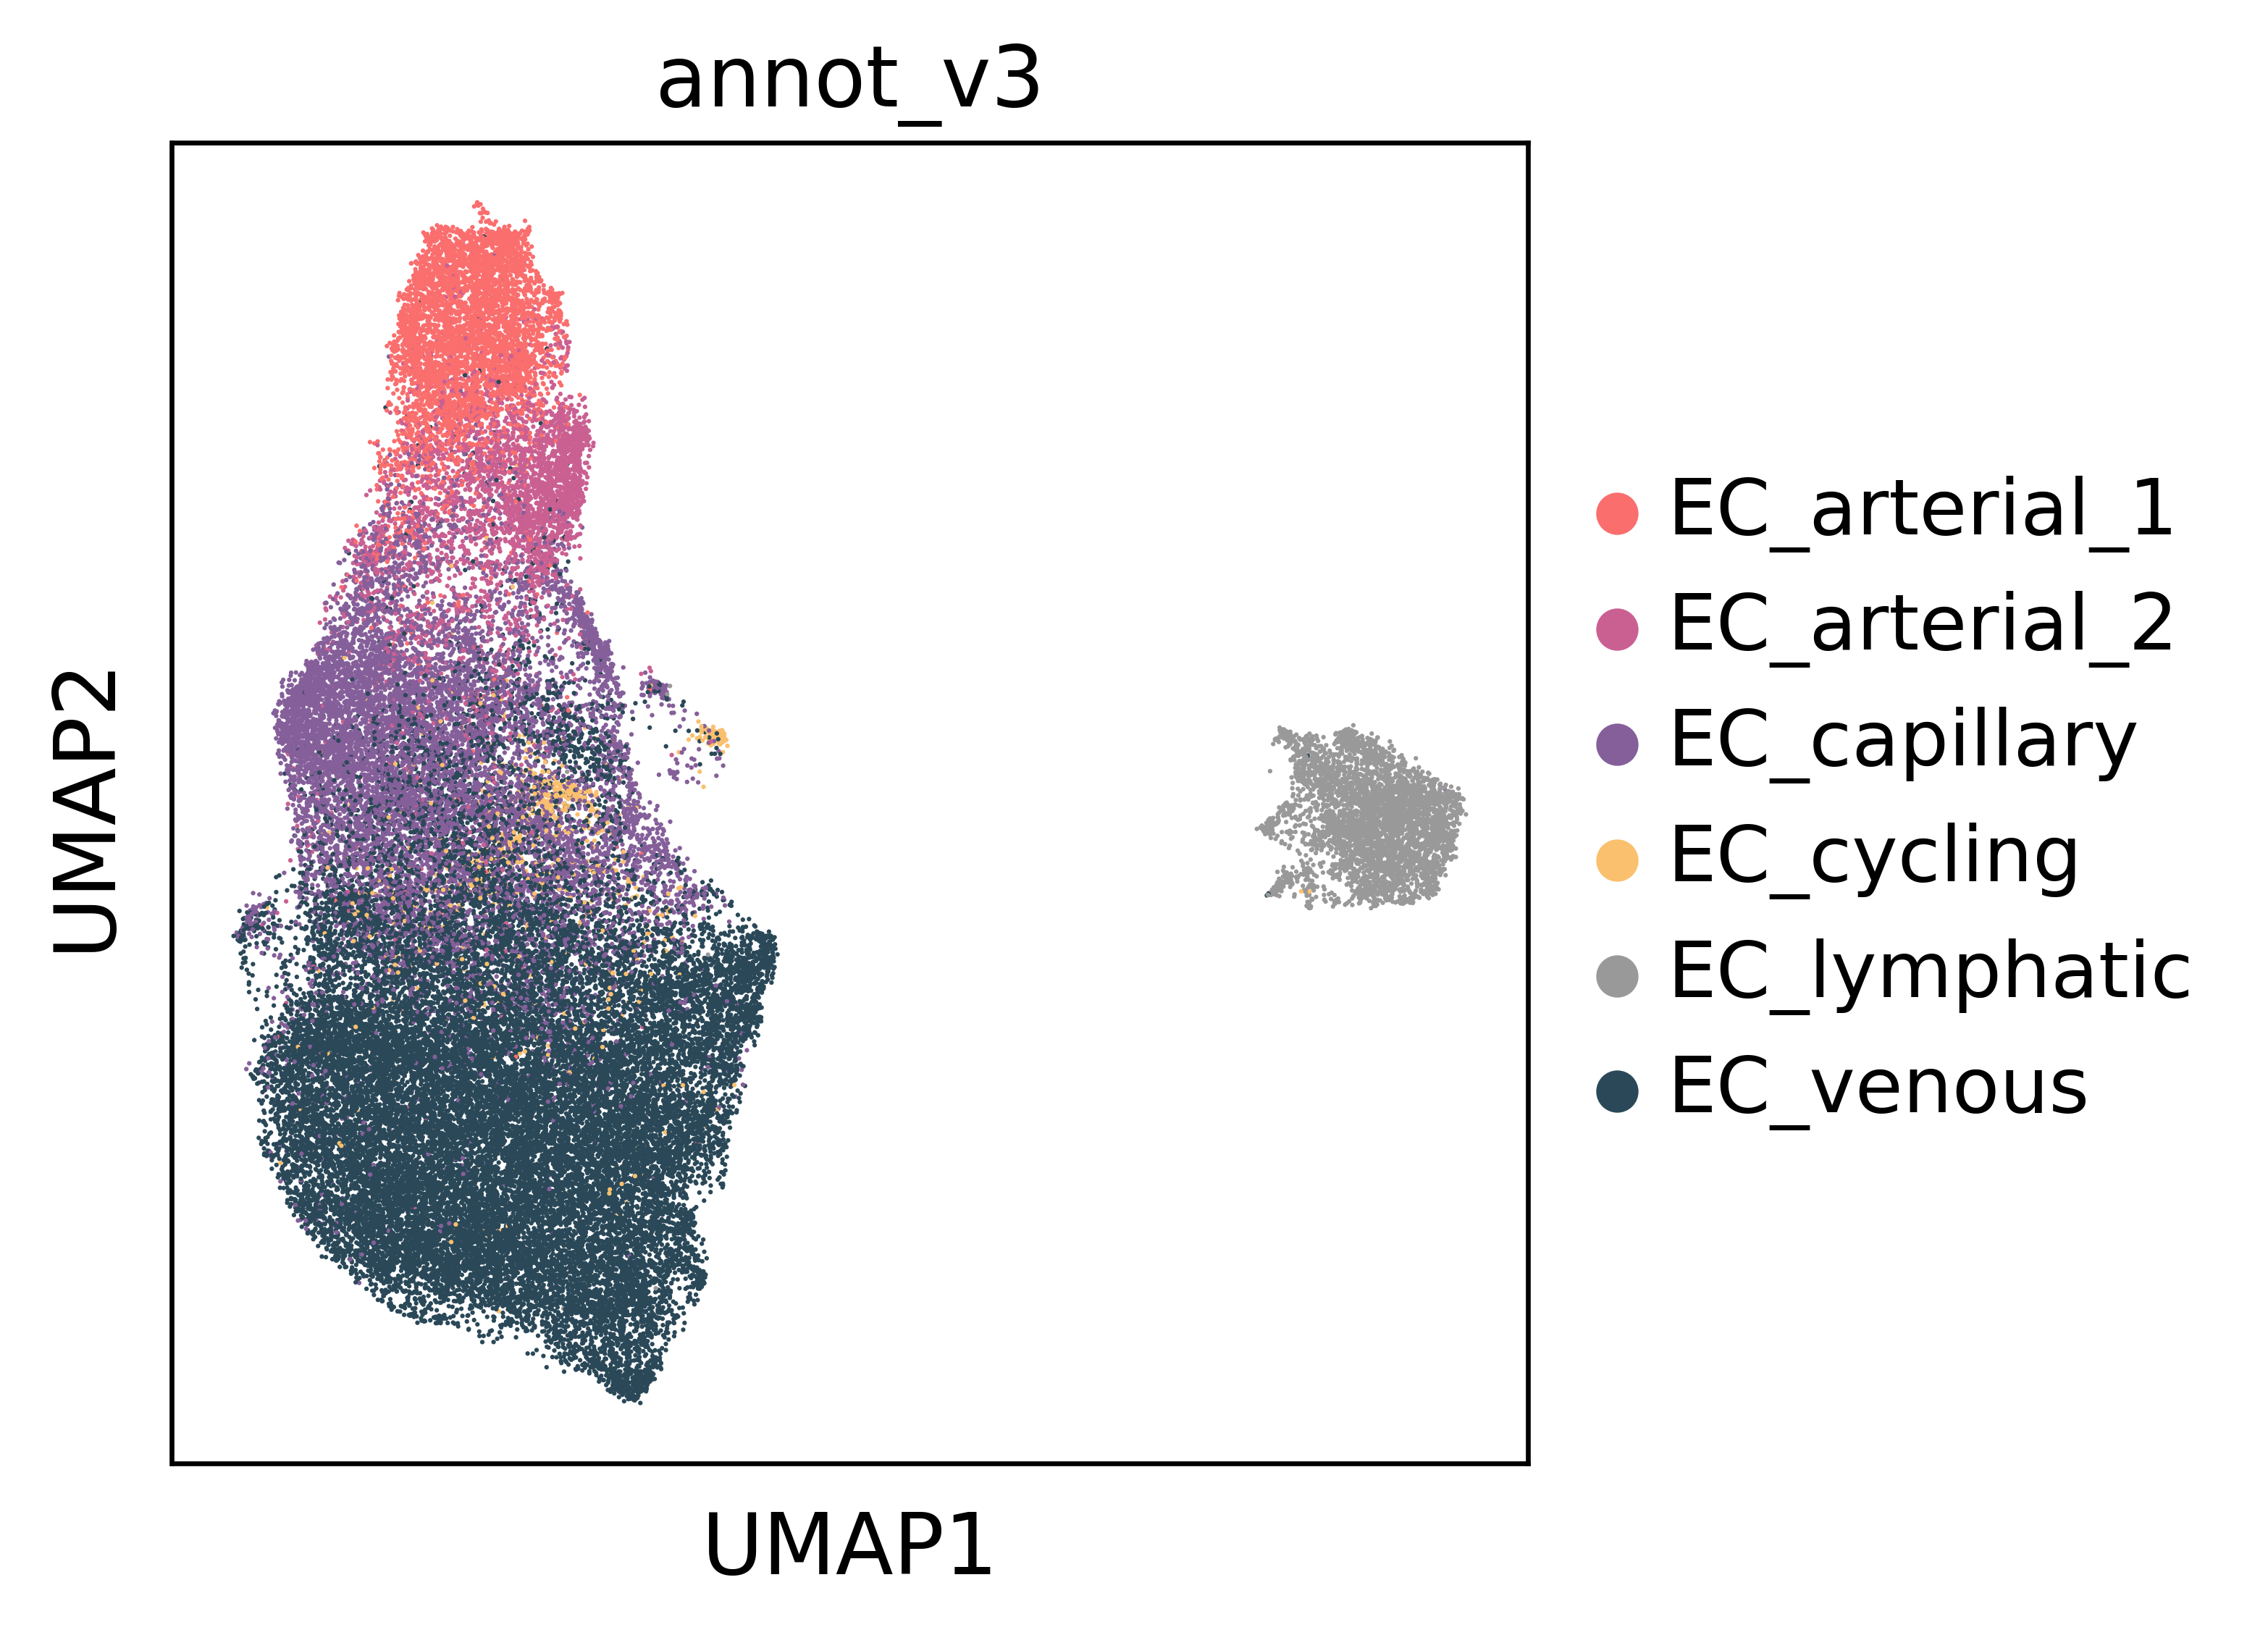

In [13]:
sc.pl.umap(adata,color='annot_v3',save='Endo_annot.png')

<AxesSubplot: title={'center': 'annot_v3'}, xlabel='UMAP1', ylabel='UMAP2'>

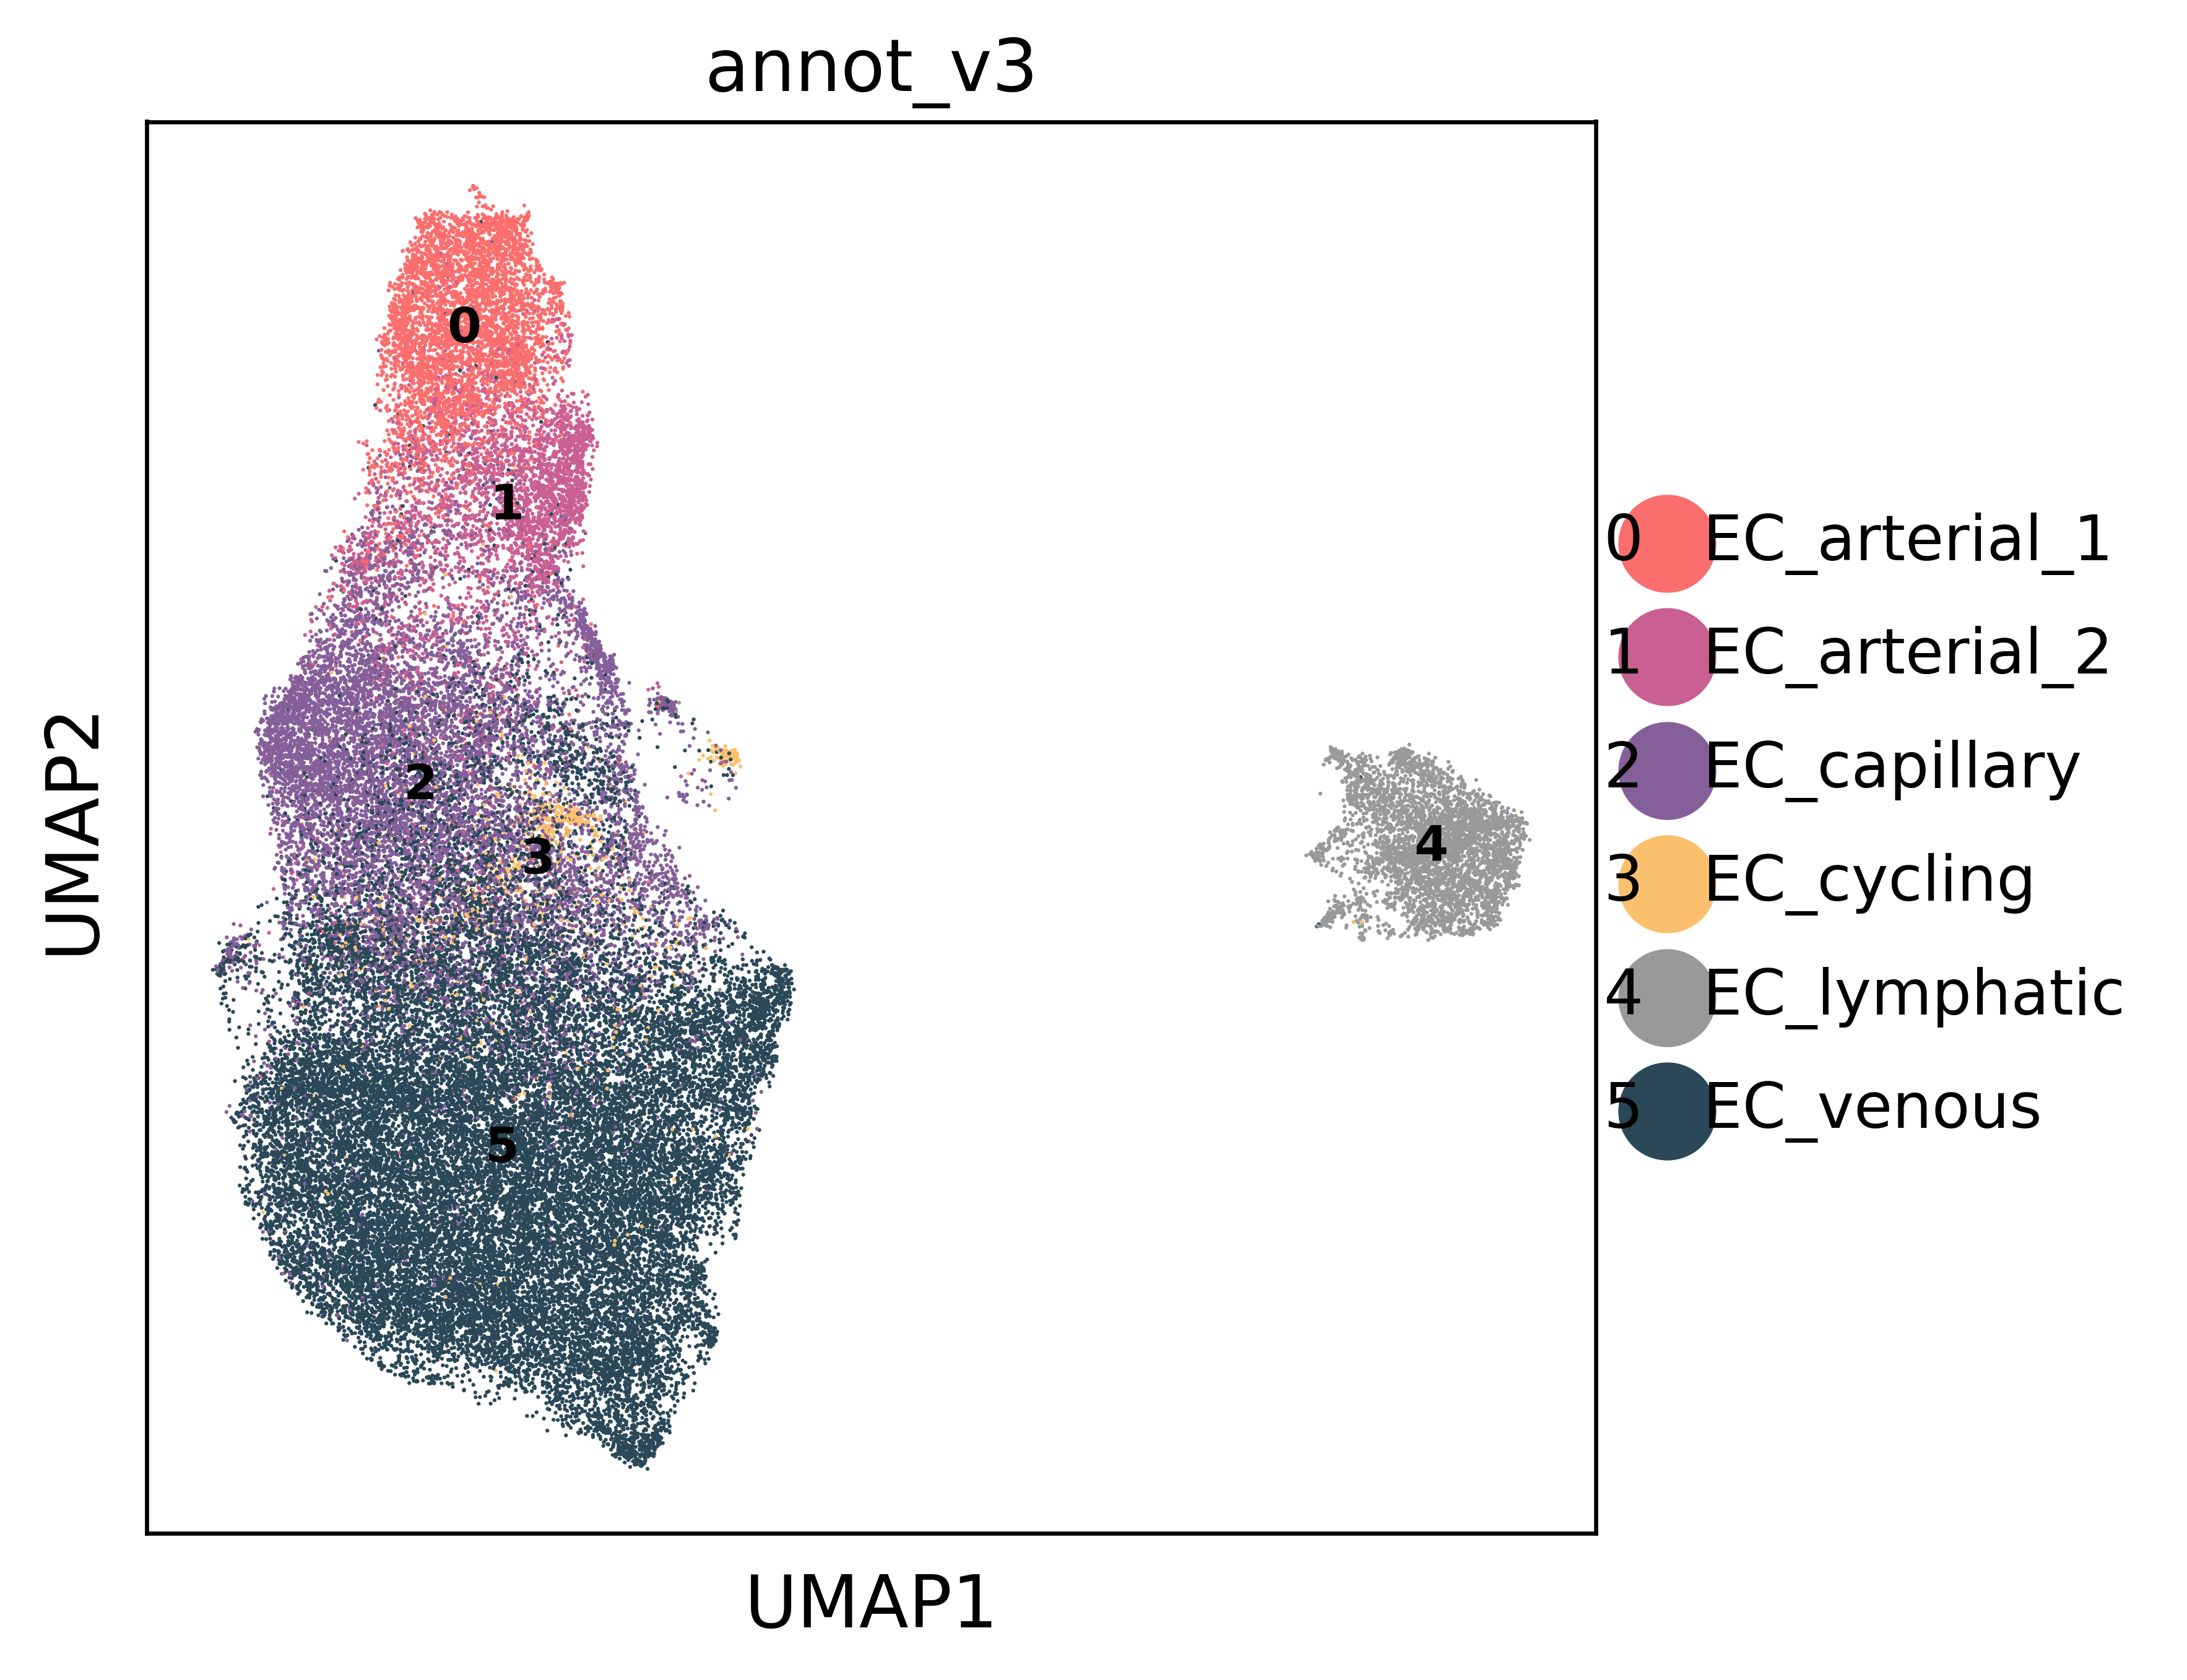

In [14]:
import sctk as sk
sk.plot_embedding(
    adata,
    basis="umap",
    groupby="annot_v3",
    figsize=(5, 5),
    save='figures/Endo_annot.png')